In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
#Download the CSV file containing the accident data from the IBM cloud

!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-12 07:46:07--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  31.2MB/s   in 2.3s   

2020-10-12 07:46:10 (31.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
#read the csv file into a Pandas dataframe
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


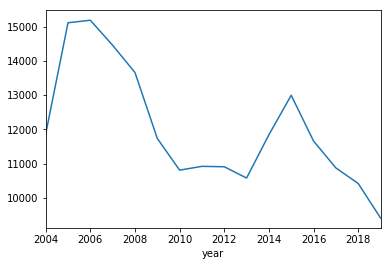

In [4]:
df_new = df
df_new['time'] = pd.to_datetime(df_new['INCDTTM'])
df_new['year'] = df_new['time'].dt.year
df_new = df_new.groupby('year', axis=0).size()
df_new = df_new[:-1]
df_new.plot()

In [4]:
print("Severity: ", df['SEVERITYCODE'].unique())
print(df.dtypes)

Severity:  [2 1]
SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       ob

In [5]:
df_new = df
df_new.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC', 'INTKEY', 'COLLISIONTYPE', 'SDOT_COLCODE', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEGLANEKEY','ST_COLCODE', 'CROSSWALKKEY', 'SDOTCOLNUM', 'ST_COLDESC', 'SEVERITYCODE.1', 'STATUS', 'LOCATION','INCDATE','INCDTTM', 'SEVERITYDESC', 'SDOT_COLDESC', 'X', 'Y'], axis=1, inplace=True)
df_new.set_index('OBJECTID', inplace=True)
df_new.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,
1,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
2,1,Block,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
3,1,Block,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
4,1,Block,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
5,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [6]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
True     190006
False      4667
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    194673
Name:

In [7]:
for key, value in df_new.iteritems(): 
    print(key, " ", df_new[key].unique()) 
    print() 

SEVERITYCODE   [2 1]

ADDRTYPE   ['Intersection' 'Block' 'Alley' nan]

PERSONCOUNT   [ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]

PEDCOUNT   [0 1 2 3 4 5 6]

PEDCYLCOUNT   [0 1 2]

VEHCOUNT   [ 2  3  1  0  4  7  5  6  8 11  9 10 12]

JUNCTIONTYPE   ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']

INATTENTIONIND   [nan 'Y']

UNDERINFL   ['N' '0' nan '1' 'Y']

WEATHER   ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']

ROADCOND   ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

LIGHTCOND   ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights'

In [8]:
df_new["HITPARKEDCAR"].replace('N', 0, inplace=True)
df_new["HITPARKEDCAR"].replace('Y', 1, inplace=True)

df_new["SPEEDING"].replace(np.nan, 0, inplace=True)
df_new["SPEEDING"].replace('Y', 1, inplace=True)


df_new["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df_new["PEDROWNOTGRNT"].replace('Y', 1, inplace=True)

df_new["LIGHTCOND"].replace('Daylight', 1, inplace=True)
df_new["LIGHTCOND"].replace('Dark - Street Lights On', 2, inplace=True)
df_new["LIGHTCOND"].replace('Dark - No Street Lights', 3, inplace=True)
df_new["LIGHTCOND"].replace('Dusk', 4, inplace=True)
df_new["LIGHTCOND"].replace('Dawn', 5, inplace=True)
df_new["LIGHTCOND"].replace('Dark - Street Lights Off', 6, inplace=True)
df_new["LIGHTCOND"].replace('Dark - Unknown Lighting', 7, inplace=True)
df_new["LIGHTCOND"].replace('Unknown', np.nan, inplace=True)
df_new["LIGHTCOND"].replace('Other', 10, inplace=True)

df_new["ROADCOND"].replace('Wet', 1, inplace=True)
df_new["ROADCOND"].replace('Dry', 2, inplace=True)
df_new["ROADCOND"].replace('Snow/Slush', 3, inplace=True)
df_new["ROADCOND"].replace('Ice', 4, inplace=True)
df_new["ROADCOND"].replace('Sand/Mud/Dirt', 5, inplace=True)
df_new["ROADCOND"].replace('Standing Water', 6, inplace=True)
df_new["ROADCOND"].replace('Oil', 7, inplace=True)
df_new["ROADCOND"].replace('Unknown', np.nan, inplace=True)
df_new["ROADCOND"].replace('Other', 10, inplace=True)

df_new["WEATHER"].replace('Overcast', 1, inplace=True)
df_new["WEATHER"].replace('Raining', 2, inplace=True)
df_new["WEATHER"].replace('Clear', 3, inplace=True)
df_new["WEATHER"].replace('Snowing', 4, inplace=True)
df_new["WEATHER"].replace('Fog/Smog/Smoke', 5, inplace=True)
df_new["WEATHER"].replace('Sleet/Hail/Freezing Rain', 6, inplace=True)
df_new["WEATHER"].replace('Blowing Sand/Dirt', 7, inplace=True)
df_new["WEATHER"].replace('Severe Crosswind', 8, inplace=True)
df_new["WEATHER"].replace('Partly Cloudy', 9, inplace=True)
df_new["WEATHER"].replace('Unknown', np.nan, inplace=True)
df_new["WEATHER"].replace('Other', 10, inplace=True)

df_new["UNDERINFL"].replace('N', 0, inplace=True)
df_new["UNDERINFL"].replace('Y', 1, inplace=True)

df_new["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df_new["INATTENTIONIND"].replace('Y', 1, inplace=True)

df_new["JUNCTIONTYPE"].replace('At Intersection (intersection related)', 1, inplace=True)
df_new["JUNCTIONTYPE"].replace('Mid-Block (not related to intersection)', 2, inplace=True)
df_new["JUNCTIONTYPE"].replace('Driveway Junction', 3, inplace=True)
df_new["JUNCTIONTYPE"].replace('Mid-Block (but intersection related)', 4, inplace=True)
df_new["JUNCTIONTYPE"].replace('At Intersection (but not related to intersection)', 5, inplace=True)
df_new["JUNCTIONTYPE"].replace('Ramp Junction', 6, inplace=True)
df_new["JUNCTIONTYPE"].replace('Unknown', np.nan, inplace=True)


df_new["ADDRTYPE"].replace('Intersection', 1, inplace=True)
df_new["ADDRTYPE"].replace('Block', 2, inplace=True)
df_new["ADDRTYPE"].replace('Alley', 3, inplace=True)

df_new.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,
1,2,1.0,2,0,0,2,1.0,0,0,1.0,1.0,1.0,0,0,0
2,1,2.0,2,0,0,2,2.0,0,0,2.0,1.0,2.0,0,0,0
3,1,2.0,4,0,0,3,2.0,0,0,1.0,2.0,1.0,0,0,0
4,1,2.0,3,0,0,3,2.0,0,0,3.0,2.0,1.0,0,0,0
5,2,1.0,2,0,0,2,1.0,0,0,2.0,1.0,1.0,0,0,0


In [9]:
# loop over rows, see if row has two or more NaN values, if yes, drop the row
count = 0
for i in range(len(df_new.index)) :
    if df_new.iloc[i].isnull().sum() >= 2:
        df_new.drop(df.index[i], inplace = True)
        count += 1

print(count)
print(len(df_new.index))
#note: cell output is an error but the goal is achieved

IndexError: single positional indexer is out-of-bounds

In [10]:
df_new.shape

(176489, 15)

In [11]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    

SEVERITYCODE
False    176489
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    176118
True        371
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    176489
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    176489
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    176489
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    176489
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    174087
True       2402
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    176489
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    175794
True        695
Name: UNDERINFL, dtype: int64

WEATHER
False    173308
True       3181
Name: WEATHER, dtype: int64

ROADCOND
False    173375
True       3114
Name: ROADCOND, dtype: int64

LIGHTCOND
False    172292
True       4197
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    176489
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    176489
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    176489
Name: HITPARKEDCAR, dtype: int64



In [12]:
df_new["ADDRTYPE"].replace(np.nan, 2, inplace=True)
df_new["JUNCTIONTYPE"].replace(np.nan, 2, inplace=True)
df_new["UNDERINFL"].replace(np.nan, 0, inplace=True)
df_new["WEATHER"].replace(np.nan, 3, inplace=True)
df_new["ROADCOND"].replace(np.nan, 2, inplace=True)
df_new["LIGHTCOND"].replace(np.nan, 1, inplace=True)

In [13]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    

SEVERITYCODE
False    176489
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    176489
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    176489
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    176489
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    176489
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    176489
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    176489
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    176489
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    176489
Name: UNDERINFL, dtype: int64

WEATHER
False    176489
Name: WEATHER, dtype: int64

ROADCOND
False    176489
Name: ROADCOND, dtype: int64

LIGHTCOND
False    176489
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    176489
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    176489
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    176489
Name: HITPARKEDCAR, dtype: int64



In [14]:
df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,
1,2,1.0,2,0,0,2,1.0,0,0,1.0,1.0,1.0,0,0,0
2,1,2.0,2,0,0,2,2.0,0,0,2.0,1.0,2.0,0,0,0
3,1,2.0,4,0,0,3,2.0,0,0,1.0,2.0,1.0,0,0,0
4,1,2.0,3,0,0,3,2.0,0,0,3.0,2.0,1.0,0,0,0
5,2,1.0,2,0,0,2,1.0,0,0,2.0,1.0,1.0,0,0,0
